In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sqlite3

In [3]:
data = sqlite3.connect("poker_updated.db")

In [4]:
start_data = pd.read_sql_query("SELECT distinct player_ID, net_gain FROM Hands", data)

In [7]:
start_data.describe()
# mean = E(net gain | first game this player plays)

,net_gain
count,47042.000000
mean,0.553440
std,19.825358
min,-410.060000
25%,-2.000000
50%,0.100000
75%,3.150000
max,421.060000


In [95]:
all_data = pd.read_sql_query("SELECT player_ID, net_gain FROM Hands limit 1000", data)
print(all_data)

         player_ID  net_gain
0       StephCurry       0.0
1      PANDAisEVIL       0.0
2        AironVega       0.0
3          IlxxxlI       0.0
4    pineapplesand       0.0
..             ...       ...
995     StephCurry       0.0
996    PANDAisEVIL       0.0
997      AironVega       0.0
998        IlxxxlI       0.0
999  pineapplesand       0.0

[1000 rows x 2 columns]


In [96]:
all_data["count"] = all_data.groupby('player_ID')['player_ID'].transform('count')
print(all_data)

         player_ID  net_gain  count
0       StephCurry       0.0     38
1      PANDAisEVIL       0.0     34
2        AironVega       0.0     61
3          IlxxxlI       0.0    144
4    pineapplesand       0.0     33
..             ...       ...    ...
995     StephCurry       0.0     38
996    PANDAisEVIL       0.0     34
997      AironVega       0.0     61
998        IlxxxlI       0.0    144
999  pineapplesand       0.0     33

[1000 rows x 3 columns]


In [97]:
all_data["running_count"] = all_data.groupby("player_ID").cumcount()+1
print(all_data)

         player_ID  net_gain  count  running_count
0       StephCurry       0.0     38              1
1      PANDAisEVIL       0.0     34              1
2        AironVega       0.0     61              1
3          IlxxxlI       0.0    144              1
4    pineapplesand       0.0     33              1
..             ...       ...    ...            ...
995     StephCurry       0.0     38             38
996    PANDAisEVIL       0.0     34             34
997      AironVega       0.0     61             61
998        IlxxxlI       0.0    144            144
999  pineapplesand       0.0     33             33

[1000 rows x 4 columns]


In [111]:
print(all_data.loc[all_data["running_count"] == 114])

    player_ID  net_gain  count  running_count
782   IlxxxlI      51.0    144            114


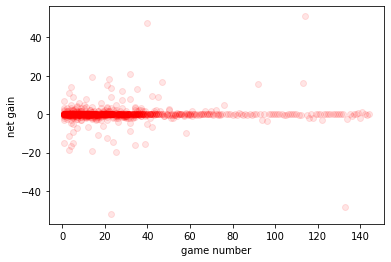

In [98]:
plt.plot(all_data["running_count"], all_data["net_gain"], 'ro', alpha=0.1)
plt.xlabel("game number")
plt.ylabel("net gain")
plt.show()

In [99]:
dl = all_data.groupby("running_count")
grouped_data = dl.aggregate(np.mean)
print(grouped_data)

               net_gain       count
running_count                      
1             -0.242432   27.027027
2             -0.007778   27.750000
3             -0.633889   27.750000
4             -0.049143   28.457143
5             -0.683333   29.939394
...                 ...         ...
140           -2.000000  144.000000
141            1.000000  144.000000
142            0.000000  144.000000
143           -0.250000  144.000000
144            0.000000  144.000000

[144 rows x 2 columns]


In [107]:
print(grouped_data.loc[[114]])

               net_gain  count
running_count                 
114                51.0  144.0


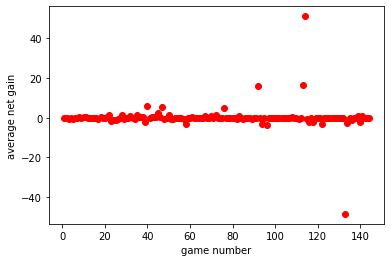

In [100]:
plt.plot(grouped_data["net_gain"], 'ro')
plt.xlabel("game number")
plt.ylabel("average net gain")
plt.show()

In [113]:
all_data["num_count"] = all_data.groupby('running_count')['running_count'].transform('count')
print(all_data)

         player_ID  net_gain  count  running_count  num_count
0       StephCurry       0.0     38              1         37
1      PANDAisEVIL       0.0     34              1         37
2        AironVega       0.0     61              1         37
3          IlxxxlI       0.0    144              1         37
4    pineapplesand       0.0     33              1         37
..             ...       ...    ...            ...        ...
995     StephCurry       0.0     38             38          8
996    PANDAisEVIL       0.0     34             34         12
997      AironVega       0.0     61             61          3
998        IlxxxlI       0.0    144            144          1
999  pineapplesand       0.0     33             33         13

[1000 rows x 5 columns]


In [115]:
all_data = all_data.loc[all_data["num_count"] >= 10]
print(all_data)

         player_ID  net_gain  count  running_count  num_count
0       StephCurry      0.00     38              1         37
1      PANDAisEVIL      0.00     34              1         37
2        AironVega      0.00     61              1         37
3          IlxxxlI      0.00    144              1         37
4    pineapplesand      0.00     33              1         37
..             ...       ...    ...            ...        ...
991      jjeannin1      2.11     13             13         29
992      trader063      0.00     13             13         29
994       Jui Kuen     -2.07     24             24         17
996    PANDAisEVIL      0.00     34             34         12
999  pineapplesand      0.00     33             33         13

[798 rows x 5 columns]


               net_gain      count  num_count
running_count                                
1             -0.242432  27.027027       37.0
2             -0.007778  27.750000       36.0
3             -0.633889  27.750000       36.0
4             -0.049143  28.457143       35.0
5             -0.683333  29.939394       33.0
6              0.022581  31.548387       31.0
7             -0.191613  31.548387       31.0
8              0.207419  31.548387       31.0
9             -0.108667  32.333333       30.0
10             0.150667  32.333333       30.0
11             0.152333  32.333333       30.0
12            -0.405172  33.068966       29.0
13             0.010345  33.068966       29.0
14            -0.090370  34.555556       27.0
15            -0.198462  35.346154       26.0
16            -0.324286  40.190476       21.0
17            -0.890000  40.190476       21.0
18             0.172000  41.350000       20.0
19            -0.261579  42.578947       19.0
20             0.026316  42.578947

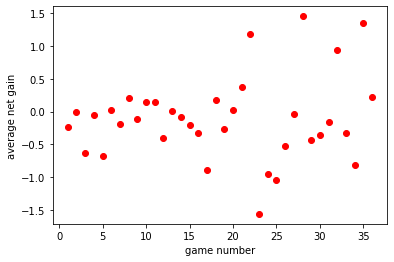

In [116]:
dl = all_data.groupby("running_count")
grouped_data = dl.aggregate(np.mean)
print(grouped_data)
plt.plot(grouped_data["net_gain"], 'ro')
plt.xlabel("game number")
plt.ylabel("average net gain")
plt.show()
#only including plots where 10 or more people had played that many games

Text(0, 0.5, 'average net gain')

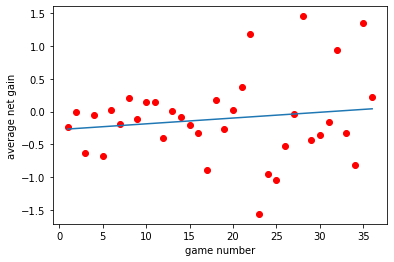

In [126]:
y= grouped_data["net_gain"]
size = y.size
x = np.arange(1,size+1)
m, b = np.polyfit(x, y, 1)
plt.plot(grouped_data["net_gain"], 'ro')
plt.plot(x, m*x +b)
plt.xlabel("game number")
plt.ylabel("average net gain")